In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers,models
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt 
from skimage import transform
import glob

2024-09-12 17:56:35.092619: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-12 17:56:35.939191: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-12 17:56:36.515053: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 17:56:37.089671: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-12 17:56:37.228973: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-12 17:56:38.858257: I tensorflow/core/platform/cpu_feature_gu

In [3]:
# The CIFAR-10 dataset contain 60000 32x32 colour images 
#  10 = classes
#  6000 = images per class
# 50000 = training images  
# 10000 = test images

In [4]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [7]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [8]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
classes[0]

'airplane'

In [11]:
def function(x,y,index):
    plt.figure(figsize=(10,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

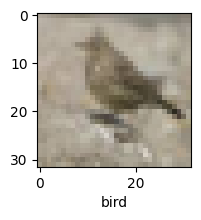

In [12]:
# testing
function(x_train,y_train,120)

In [13]:
# we want to do normalize [0-255]
# categorial_crossentropy --- ex [0,1]
# sparse_categorical_crossentropy ---- ex y = value [8]
x_train = x_train/255
x_test = x_test/255

In [14]:
cnn = models.Sequential([

    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape= (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape= (32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

/home/hepl/Desktop/Keerthanaa/Keerthii/July/AI Training/Image_Classification/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'] )

In [16]:
cnn.fit(x_train,y_train,epochs=18)

Epoch 1/18


2024-09-12 17:57:49.023956: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3556 - loss: 1.7674
Epoch 2/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5759 - loss: 1.2047
Epoch 3/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6308 - loss: 1.0586
Epoch 4/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6630 - loss: 0.9630
Epoch 5/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6810 - loss: 0.9058
Epoch 6/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7030 - loss: 0.8563
Epoch 7/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7162 - loss: 0.8084
Epoch 8/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7336 - loss: 0.7730
Epoch 9/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7446 - loss: 0.7353
Epoch 10/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7481 - loss: 0.7204
Epoch 11/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7621 - loss: 0.6767
Epoch 12/18
1563/1563 ━━━━━━━━

In [17]:
cnn.evaluate(x_test,y_test)

 46/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - loss: 1.0240

2024-09-12 18:01:06.322501: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6766 - loss: 1.0229


[1.021058201789856, 0.680899977684021]

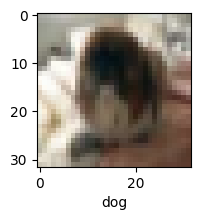

In [18]:
function(x_test,y_test,200)

In [19]:
#manually
y_pred = cnn. predict(x_test)

 46/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

2024-09-12 18:01:16.477626: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
y_pred[:5]

array([[1.8408291e-06, 5.5515493e-06, 1.7554966e-04, 9.5027733e-01,
        5.3699091e-06, 4.7400221e-02, 1.8600514e-03, 1.3210528e-06,
        2.7098568e-04, 1.6784805e-06],
       [9.5843204e-04, 1.5154485e-01, 1.0343304e-07, 6.4370229e-09,
        2.0506497e-09, 2.9260919e-12, 2.5981051e-09, 1.2088867e-11,
        8.4741485e-01, 8.1680417e-05],
       [3.1892985e-02, 6.8028726e-02, 7.1696006e-05, 8.0544596e-05,
        9.7582424e-06, 4.6894202e-06, 7.1767595e-06, 9.1511974e-05,
        8.9723498e-01, 2.5779691e-03],
       [9.3756771e-01, 2.3332676e-02, 2.9867160e-04, 8.5262931e-05,
        8.1048647e-06, 2.0937634e-06, 1.3614176e-05, 3.3980725e-06,
        3.8669359e-02, 1.8997916e-05],
       [4.0816449e-06, 2.3451842e-04, 5.1346503e-02, 5.1193021e-02,
        6.0830437e-02, 5.9453524e-03, 8.3014739e-01, 1.6698419e-06,
        2.9432992e-04, 2.6095736e-06]], dtype=float32)

In [21]:
op = [np.argmax(i) for i in y_pred]
op[:5]

[3, 8, 8, 0, 6]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

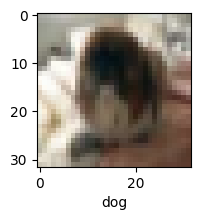

In [23]:
function(x_test,y_test,200)

In [24]:
classes[op[200]]

'dog'

In [25]:
print('classification report:\n',classification_report(y_test,op))

classification report:
               precision    recall  f1-score   support

           0       0.67      0.72      0.70      1000
           1       0.81      0.80      0.80      1000
           2       0.53      0.62      0.57      1000
           3       0.49      0.55      0.52      1000
           4       0.68      0.54      0.60      1000
           5       0.62      0.56      0.59      1000
           6       0.76      0.78      0.77      1000
           7       0.73      0.73      0.73      1000
           8       0.79      0.75      0.77      1000
           9       0.77      0.76      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [26]:
img = plt.imread('bird_img.jpg')

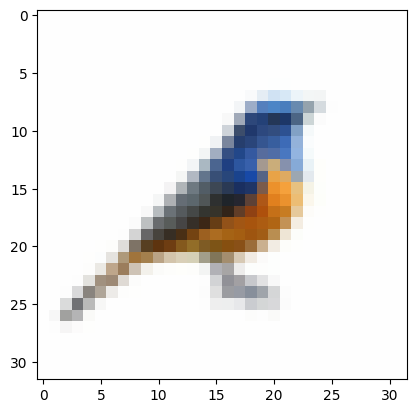

In [27]:
re = transform.resize(img,(32,32,3))
plt.imshow(re)

In [28]:
prediction = cnn.predict(np.array([re]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [29]:
output = [np.argmax(i) for i in prediction]

In [30]:
output[:5]

[2]

In [31]:
prediction

array([[7.4474528e-03, 1.2116106e-08, 9.9254829e-01, 2.0894149e-06,
        2.9245189e-07, 6.0817065e-08, 6.1910004e-07, 1.6421310e-09,
        1.2473407e-06, 3.2110042e-10]], dtype=float32)

In [32]:
print(classes[output[0]])

bird
